# import

In [127]:
import pandas as pd
import seaborn as sns

In [128]:
data_base = pd.read_csv('updatetips.csv', sep =',')

In [129]:
data_base.sample(5)

,total_bill,tip,dessert,day,time,size
609,12.162775,1.829866,No,Thur,Lunch,2
2979,11.225329,2.746776,No,Sun,Dinner,2
3153,15.320060,2.626994,Yes,Fri,Lunch,2
2229,22.475655,1.978473,No,Sat,Dinner,4
462,8.481685,1.552814,Yes,Sat,Dinner,2


In [130]:
# translate (if necessary)
data_base.columns # to discover all the columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [131]:
rename = {
    'total_bill': 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoa'
}

In [132]:
type(rename)

dict

In [133]:
#saving in a new variable:

gorjetas = data_base.rename(columns = rename)

In [134]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [135]:
# translating the fields
# checking the field options for 'sobremesa' column

gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [136]:
# translation:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [137]:
# using .map() to map all yes and no's:

gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [138]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [139]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Sun,Dinner,2


In [140]:
# checking options for days of week
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [141]:
#translation:
dias = {
    'Sun' : 'Dom',
    'Sat' : 'Sab',
    'Thur' : 'Quin',
    'Fri' : 'Sext'
}

In [142]:
# using .map()
gorjetas.dia_da_semana.map(dias)

0        Dom
1        Dom
2        Dom
3        Dom
4        Dom
        ... 
3411     Sab
3412     Sab
3413     Sab
3414     Sab
3415    Quin
Name: dia_da_semana, Length: 3416, dtype: object

In [143]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [144]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Dom,Dinner,2


In [145]:
# translation hora_do_dia
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [146]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [147]:
#using .map()

gorjetas.hora_do_dia.map(hora)

0       Jantar
1       Jantar
2       Jantar
3       Jantar
4       Jantar
         ...  
3411    Jantar
3412    Jantar
3413    Jantar
3414    Jantar
3415    Jantar
Name: hora_do_dia, Length: 3416, dtype: object

In [148]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [149]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Dom,Jantar,2


# Graphs with Seaborn

In [150]:
# checking existing columns :
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoa'],
      dtype='object')

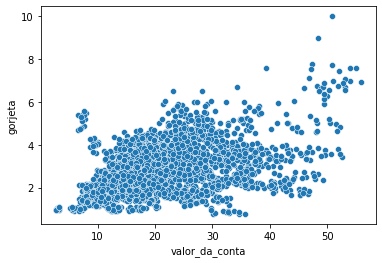

In [151]:
scatter_tips = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

In [152]:
# Based only on this graphic, we can Imagine that bigger the 'valor_da_conta' bigger will be the 'gorjeta'
# checking the number of entries:

print('The database have {} entries'.format(gorjetas.shape[0]))

The database have 3416 entries


In [153]:
# cheking if the dataBase have null values:

gorjetas.count()

valor_da_conta     3416
gorjeta            3416
sobremesa          3416
dia_da_semana      3416
hora_do_dia        3416
total_de_pessoa    3416
dtype: int64

In [154]:
# The database have 244 entries and every column have 244 values, so no NaN values

# Checking % 

In [155]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Dom,Jantar,2


In [156]:
#creating a column for % 

gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [157]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [158]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16


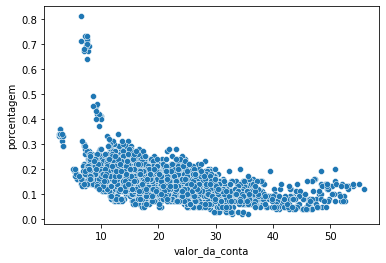

In [159]:
porcentagem_conta = sns.scatterplot(x ='valor_da_conta', y = 'porcentagem', data = gorjetas)

In [160]:
# based on this graphic we can see that besiede the tip be greatter when the bill is high, this value is not proportional
# people with smaller bills give more porportional tips

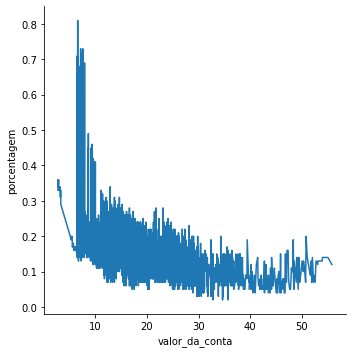

In [161]:
#ploting graphic in another way:

porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data=gorjetas)

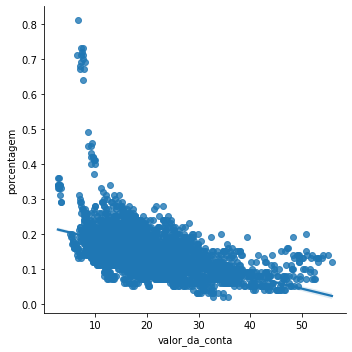

In [162]:
# to check the progression of the data we have:

porcentagem_conta_linha_lm = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

In [163]:
# here we see the progression is downwards
#exporting figures:

scatter1 = porcentagem_conta.get_figure()
scatter1.savefig('scatter1.png')

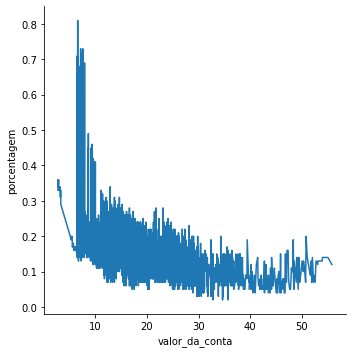

In [164]:
#thats the way of plotting a graph with relplot config
porcentagem_conta_linha = sns.relplot(
    data = gorjetas,
    x = 'valor_da_conta',
    y = 'porcentagem',
    kind = 'line'
)

porcentagem_conta_linha.savefig('line.png')

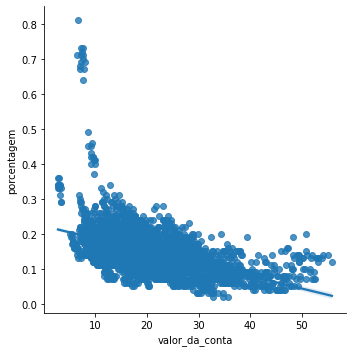

In [165]:
#thats the way of plotting a graph with relplot config

porcentagem_conta_linha_lm = sns.lmplot(
    data = gorjetas,
    x = 'valor_da_conta',
    y = 'porcentagem'
)

porcentagem_conta_linha_lm.savefig('linha_lm.png')

## Checking relation between dessert and tips

In [166]:
gorjetas['sobremesa']

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [167]:
gorjetas[gorjetas['sobremesa']== 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [168]:
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


In [169]:
# based on that, we can see the tips are practically the same for table with dessert and don't

In [170]:
# let's check using graphic information

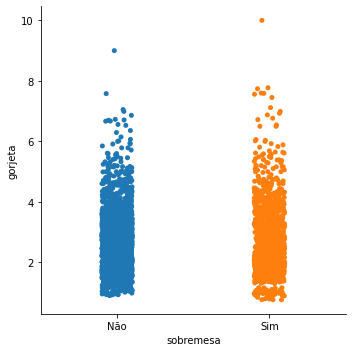

In [171]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

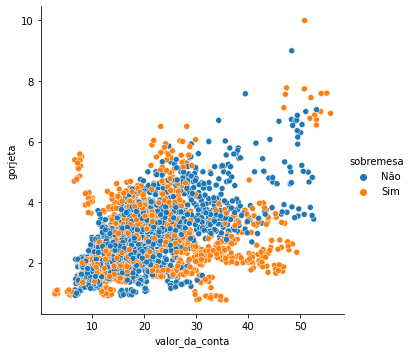

In [172]:
sns.relplot(x = 'valor_da_conta', y= 'gorjeta', hue='sobremesa', data = gorjetas)

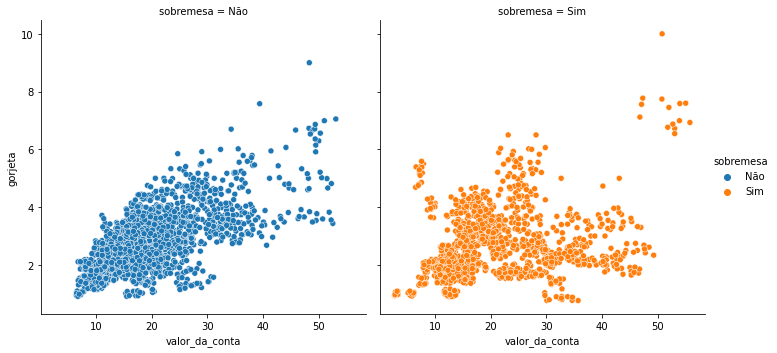

In [173]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

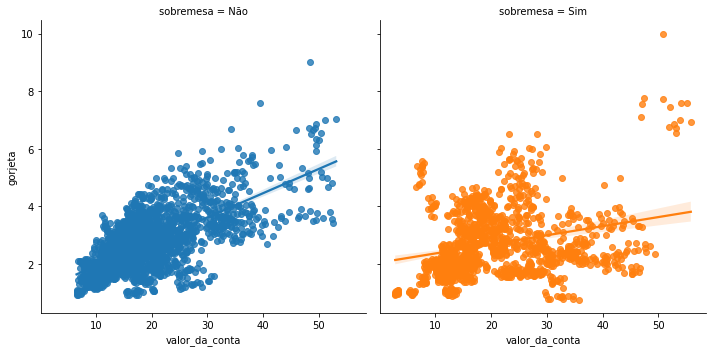

In [174]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col='sobremesa', hue='sobremesa', data = gorjetas)

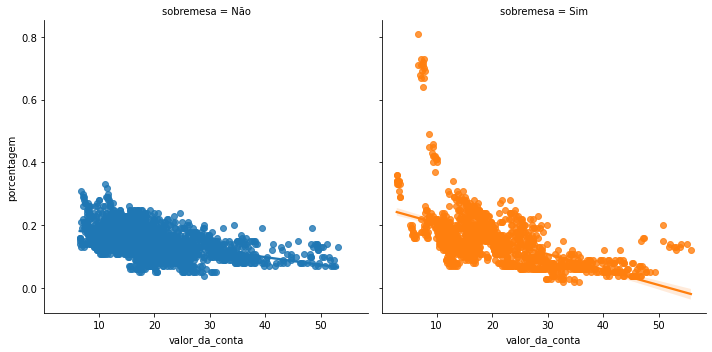

In [175]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col='sobremesa', hue ='sobremesa', data = gorjetas)

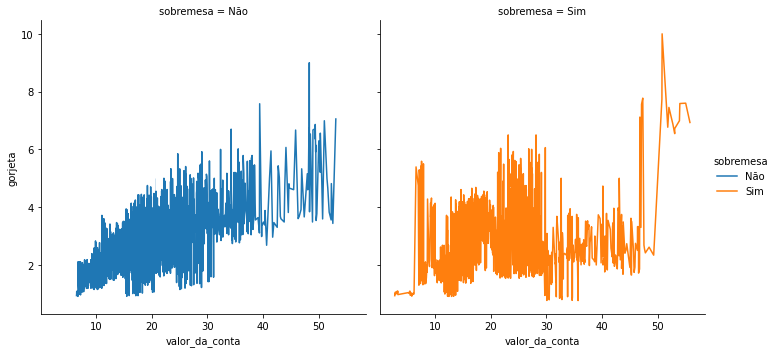

In [176]:
sns.relplot(x = 'valor_da_conta', y= 'gorjeta', col='sobremesa', hue='sobremesa', kind='line', data = gorjetas)

In [177]:
# we can see that there is a Correlation between the dessert option and the tips, but its very very Subtle, 
# in order to obtain better results we will check some statistics 

## Hypotheses test

**H<sup>null</sup>**

** The distribuition of tips in both groups are the same **

**H<sup>alt</sup>**

** The distribuition of tips in both groups are not the same **

In [178]:
# to check we need to import another library:

from scipy.stats import ranksums

In [179]:
# creating a Series with dessert:

sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [180]:
# creating a Series without dessert:

sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [181]:
# using ranksums: 

r = ranksums(sobremesa, sem_sobremesa) 

In [182]:
# Looking at the pvalye = 0.52 we can see that besiede having a difference between both groups,
# this differrence is irrelevant. Based on that, extrapolating to the whole population,
# we can't affirm that will be different as well 

print('The p-value is: {}'.format(r.pvalue))

The p-value is: 0.033144013617673405


**H<sup>null</sup>**
** The distribuition of tips in both groups are the same **

# Analysis based on days of the week

In [183]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


In [184]:
gorjetas.dia_da_semana.unique()

array(['Dom', 'Sab', 'Quin', 'Sext'], dtype=object)

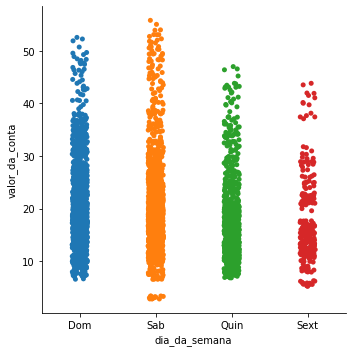

In [185]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

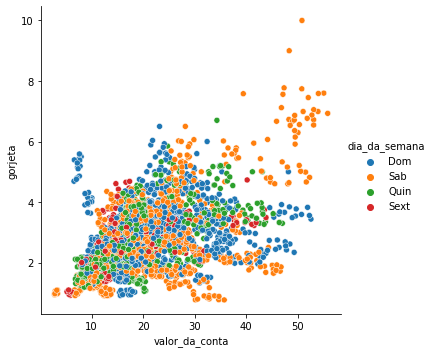

In [186]:
sns.relplot(x= 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

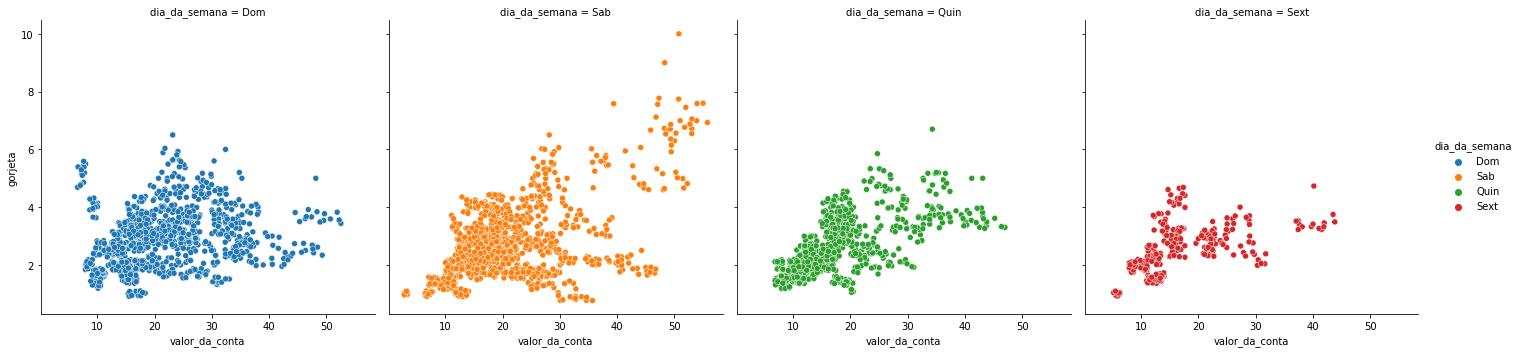

In [187]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

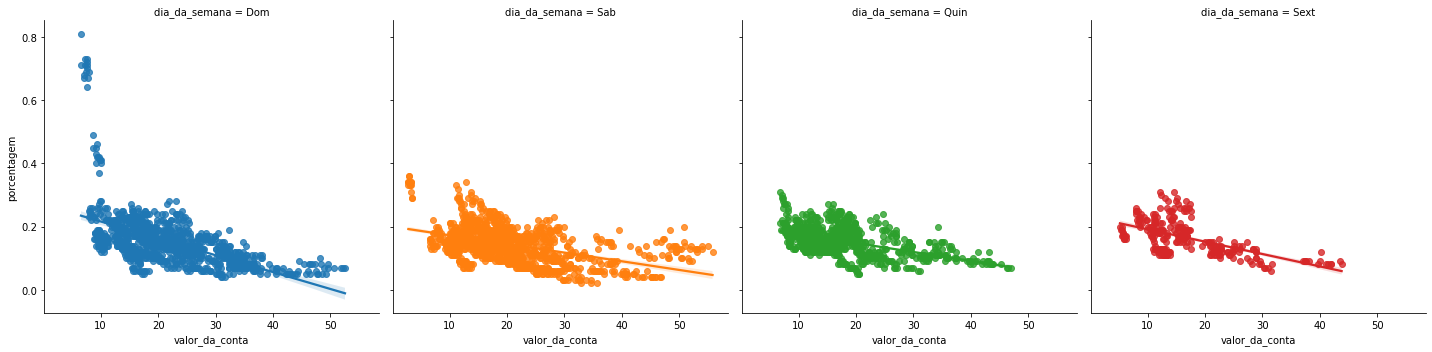

In [188]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col ='dia_da_semana', data = gorjetas)

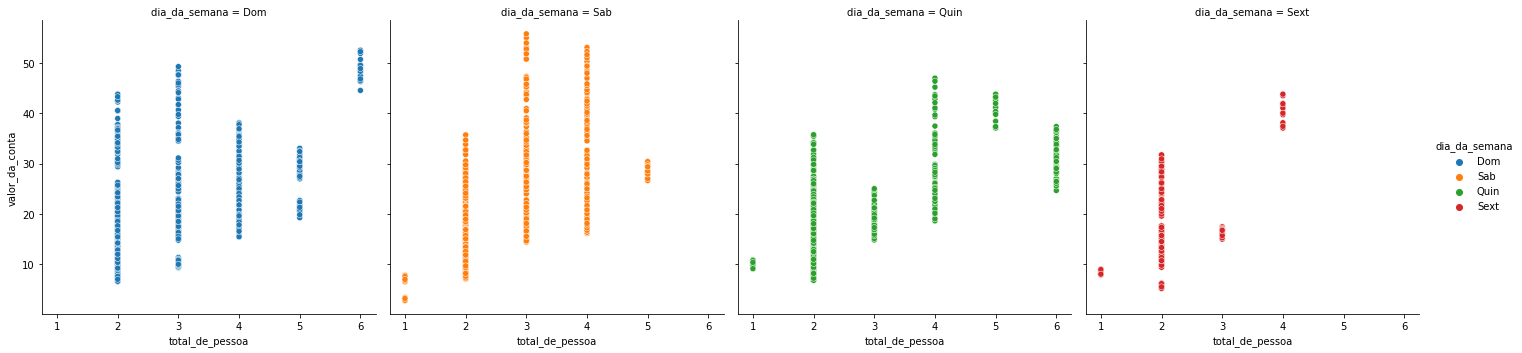

In [189]:
sns.relplot(x = 'total_de_pessoa', y = 'valor_da_conta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [190]:
# media gorjetas:

media_geral_gorjetas = gorjetas.gorjeta.mean()

In [191]:
print('The media for gorjetas is: {}'.format(media_geral_gorjetas)) 

The media for gorjetas is: 2.7111892140916103


In [192]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
dia_da_semana,,,,
Dom,21.439133,2.902079,2.842105,0.154953
Quin,17.724088,2.556177,2.451613,0.154090
Sab,20.480249,2.690114,2.517241,0.143604
Sext,17.215616,2.549960,2.105263,0.163158


In [193]:
gorjetas.groupby([ 'dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']].round(2)

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Dom,21.44,2.90,0.15
Quin,17.72,2.56,0.15
Sab,20.48,2.69,0.14
Sext,17.22,2.55,0.16


In [194]:
# number of people per day
print('People per day')
gorjetas.dia_da_semana.value_counts()

People per day


Sab     1218
Dom     1064
Quin     868
Sext     266
Name: dia_da_semana, dtype: int64

## Hypotheses test

**H<sup>null</sup>**
** The distribuition 'valor_da_conta' is the same for Sab and Dom **

**H<sup>alt</sup>**
** The distribuition 'valor_da_conta'is not the same for Sab and Dom**

In [195]:
conta_domingo = gorjetas.query("dia_da_semana == 'Dom'").valor_da_conta.round(2)

In [196]:
conta_domingo

0       16.99
1       10.34
2       21.01
3       23.68
4       24.59
        ...  
3358    21.99
3359    32.41
3360    18.52
3361    21.52
3362    14.23
Name: valor_da_conta, Length: 1064, dtype: float64

In [197]:
conta_sabado = gorjetas.query("dia_da_semana == 'Sab'").valor_da_conta.round(2)

In [198]:
conta_sabado

19      20.65
20      17.92
21      20.29
22      15.77
23      39.42
        ...  
3410    38.66
3411    26.33
3412    25.53
3413    21.55
3414    18.97
Name: valor_da_conta, Length: 1218, dtype: float64

In [199]:
r_sabdom = ranksums(conta_domingo, conta_sabado)

In [200]:
r_sabdom

RanksumsResult(statistic=3.512531470033938, pvalue=0.00044385943599401157)

In [201]:
# to accept the halt the pvalue have to be less than 0.05, as the pvalue = 0.35 the hnull is the right one

**H<sup>null</sup>**
** The distribuition 'valor_da_conta' is the same for Sab and Dom **

# Distplot, boxplot and violinplot

In [202]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


In [203]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

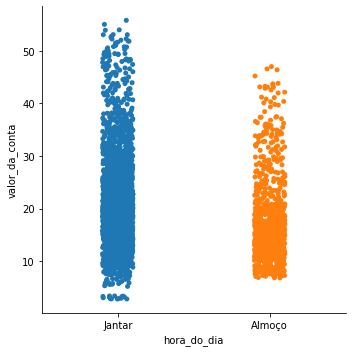

In [204]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

/Users/victorfigueiredo/opt/anaconda3/envs/study_alura/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/victorfigueiredo/opt/anaconda3/envs/study_alura/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


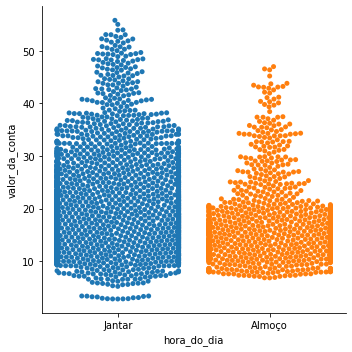

In [205]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

In [206]:
# the kind = swarm allow us a better visualization when you have a lot of data with the same values

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

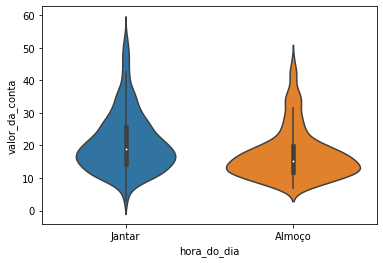

In [207]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta' , data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

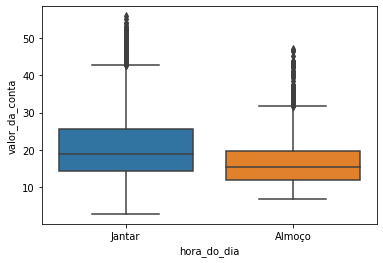

In [208]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [209]:
# to dist plot:

almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

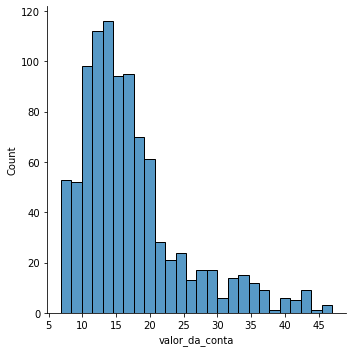

In [210]:
sns.displot(almoco)

In [211]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

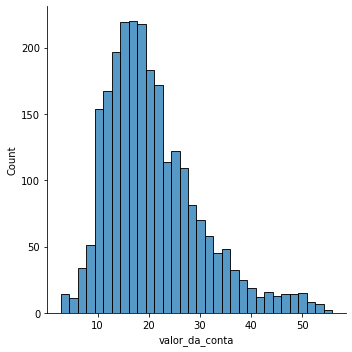

In [212]:
sns.displot(jantar)

In [213]:
gorjetas.groupby(['hora_do_dia']).mean().round(2)

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
hora_do_dia,,,,
Almoço,17.21,2.53,2.41,0.16
Jantar,20.83,2.78,2.63,0.15


## Hypothesis test


**H<sup>null</sup>**

** The distribuition of 'valor_da_conta' is the same at Almoço e Jantar **

**H<sup>alt</sup>**

** The distribuition of 'valor_da_conta' is not the same at Almoço e Jantar **

In [214]:
ranksums(jantar, almoco)

RanksumsResult(statistic=12.158511455786174, pvalue=5.169201062207143e-34)

In [215]:
# Result

**H<sup>alt</sup>**

** The distribuition of 'valor_da_conta' is not the same at Almoço e Jantar **

In [216]:
print('The value of p-value is: {}'.format(ranksums(jantar, almoco).pvalue))

The value of p-value is: 5.169201062207143e-34
